<a href="https://colab.research.google.com/github/fboldt/aulasml/blob/master/aula2_regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [279]:
from sklearn.datasets import make_regression
X, y = make_regression(n_features=1)
X.shape, y.shape

((100, 1), (100,))

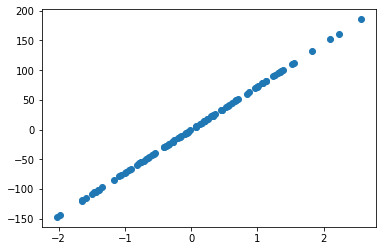

In [280]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.show()

75.95295291633313


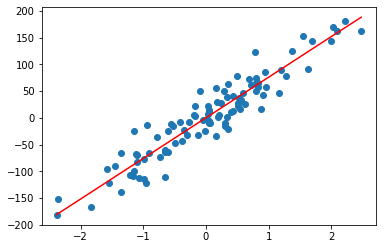

In [281]:
X, y, coef = make_regression(n_features=1, noise=30, coef=True, random_state=4)
print(coef)
xmin, xmax = min(X), max(X)
plt.scatter(X, y)
plt.plot([xmin, xmax], [xmin, xmax]*coef, c='r')
plt.show()

In [282]:
def modelo_linear(X, coef):
  y = X*coef
  return y.reshape(-1,)
ypred = modelo_linear(X, coef)
ypred.shape

(100,)

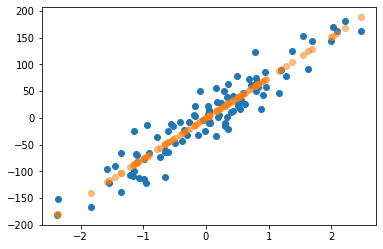

In [283]:
plt.scatter(X, y)
plt.scatter(X, modelo_linear(X, coef), alpha=0.5)
plt.show()

In [284]:
import numpy as np

def mae(y, ypred):
  ydif = ypred - y
  yabs = abs(ydif)
  esum = np.sum(yabs)
  mae = esum/len(yabs)
  return mae

ypred = modelo_linear(X, coef)
mae(y, ypred)

20.636951137353734

In [285]:
def mse(y, ypred):
  ydif = ypred - y
  ysqr = ydif**2
  esum = np.sum(ysqr)
  mse = esum/len(ysqr)
  return mse

ypred = modelo_linear(X, coef)
mse(y, ypred)

655.5657700738702

In [286]:
from sklearn.metrics import mean_squared_error
def rmse(y, ypred):
  return np.sqrt(mean_squared_error(y, ypred))

ypred = modelo_linear(X, coef)
rmse(y, ypred)

25.60401863133735

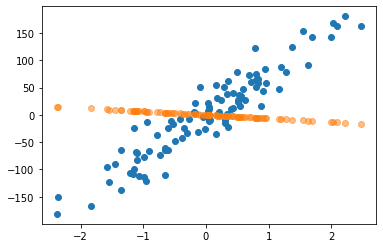

82.69061453038107

In [287]:
class RegressãoLinear():
  def __init__(self):
    self.coef_ = np.random.uniform(-100, 200, (1,))

  def predict(self, X):
    y = X*self.coef_
    return y.reshape(-1,)

modelo = RegressãoLinear()
ypred = modelo.predict(X)
plt.scatter(X, y)
plt.scatter(X, ypred, alpha=0.5)
plt.show()
rmse(y, ypred)

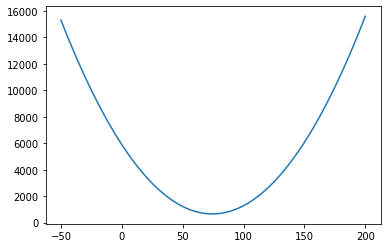

In [288]:
coefs = np.linspace(-50, 200, 100)
mses = []
modelo = RegressãoLinear()
for coef in coefs:
  modelo.coef_ = coef
  ypred = modelo.predict(X)
  mse = mean_squared_error(y, ypred)
  mses.append(mse)
plt.plot(coefs, mses)
plt.show()

In [289]:
def mse_c(coef):
  modelo = RegressãoLinear()
  modelo.coef_ = coef
  ypred = modelo.predict(X)
  return mean_squared_error(y, ypred)

mse_c(50)

1217.5488429385516

In [290]:
def derivada(função, valor):
  h = 0.0000000001
  return (função(valor+h) - função(valor))/h

derivada(mse_c, 50), derivada(mse_c, 100)

(-46.252353058662266, 48.52836354984902)

In [291]:
from scipy.misc import derivative
derivative(mse_c, 50), derivative(mse_c, 100)

(-46.252257334948695, 48.52825188539771)

In [292]:
def derivada_mse_c(coef):
  modelo = RegressãoLinear()
  modelo.coef_ = coef
  ypred = modelo.predict(X)
  erro = ypred - y
  return 2*np.mean(X * erro.reshape(-1,1))

derivada_mse_c(50), derivada_mse_c(100)

(-46.25225733494862, 48.528251885397765)

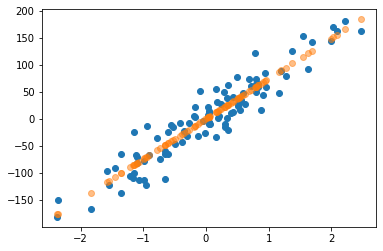

(25.5593232217714, array([74.39966705]))

In [293]:
class RegressãoLinear():
  def __init__(self, learning_rate=.1, max_iter=100):
    self.learning_rate = learning_rate
    self.max_iter = max_iter
    self.coef_hist = []
  
  def fit(self, X, y):
    self.coef_ = np.random.uniform(-100,100,(1,))
    for _ in range(self.max_iter):
      ypred = self.predict(X)
      erro = ypred - y
      ajuste = 2*np.mean(X * erro.reshape(-1,1))
      self.coef_ -= ajuste*self.learning_rate
      self.coef_hist.append(self.coef_.copy())

  def predict(self, X):
    y = X*self.coef_
    return y.reshape(-1,)

modelo = RegressãoLinear()
modelo.fit(X, y)
ypred = modelo.predict(X)
plt.scatter(X, y)
plt.scatter(X, ypred, alpha=0.5)
plt.show()
rmse(y, ypred), modelo.coef_

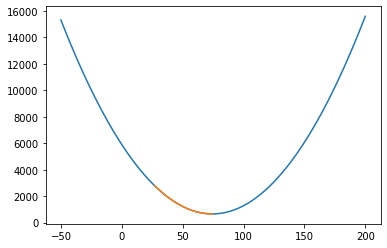

In [294]:
modelo = RegressãoLinear(learning_rate=.1, max_iter=100)
modelo.fit(X, y)

plt.plot(coefs, mses)
plt.plot(modelo.coef_hist, [mse_c(coef) for coef in modelo.coef_hist])
plt.show()

75.95295291633313


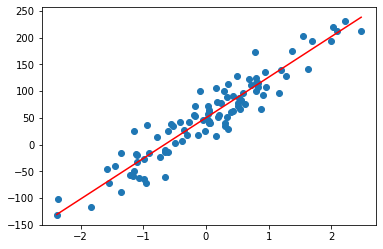

In [295]:
X, y, coef = make_regression(n_features=1, noise=30, coef=True, random_state=4, bias=50)
print(coef)
xmin, xmax = min(X), max(X)
plt.scatter(X, y)
plt.plot([xmin, xmax], [xmin, xmax]*coef+50, c='r')
plt.show()

In [296]:
def modelo_linear(X, coef, intercept):
  y = X * coef + intercept
  return y.reshape(-1,)

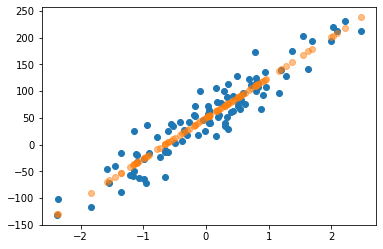

In [297]:
plt.scatter(X, y)
plt.scatter(X, modelo_linear(X, coef, 50), alpha=0.5)
plt.show()

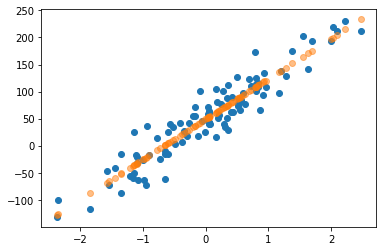

(25.55111261955055, array([[49.35177236],
        [74.42379152]]))

In [298]:
class RegressãoLinear():
  def __init__(self, learning_rate=.01, max_iter=100):
    self.learning_rate = learning_rate
    self.max_iter = max_iter
    self.coef_hist = []
  
  def fit(self, X, y):
    Xb = np.concatenate((np.ones((X.shape[0],1)), X),axis=1)
    self.coef_ = np.random.uniform(-100,100,(Xb.shape[1],1))
    for _ in range(self.max_iter):
      ypred = self.predict(X)
      erro = ypred - y
      ajuste = Xb.T.dot(erro.reshape(-1,1))
      self.coef_ -= ajuste*self.learning_rate
      self.coef_hist.append(self.coef_.copy())

  def predict(self, X):
    Xb = np.concatenate((np.ones((X.shape[0],1)), X),axis=1)
    y = Xb.dot(self.coef_)
    return y.reshape(-1,)

modelo = RegressãoLinear()
modelo.fit(X, y)
ypred = modelo.predict(X)
plt.scatter(X, y)
plt.scatter(X, ypred, alpha=0.5)
plt.show()
rmse(y, ypred), modelo.coef_

In [306]:
from random import random
X, y = make_regression(noise=30, bias=random()*100)

In [307]:
from scipy.linalg import pinv

class RegressãoLinear():  
  def fit(self, X, y):
    Xb = np.concatenate((np.ones((X.shape[0],1)), X),axis=1)
    self.coef_ = np.matmul(pinv(Xb), y)

  def predict(self, X):
    Xb = np.concatenate((np.ones((X.shape[0],1)), X),axis=1)
    y = Xb.dot(self.coef_)
    return y.reshape(-1,)

modelo = RegressãoLinear()
modelo.fit(X, y)
ypred = modelo.predict(X)
rmse(y, ypred)

6.922987011953866e-13